In [247]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
accepted = pd.read_csv("Lending_Club_Accepted_2014_2018.csv", low_memory=False)

In [47]:
accepted36 = accepted[accepted["term"] == " 36 months"]
accepted60 = accepted[accepted["term"] == " 60 months"]

12853.865329269176


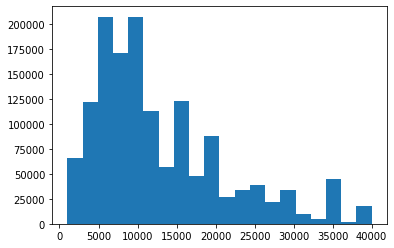

In [104]:
plt.hist(accepted36["loan_amnt"], bins=20)
print(accepted36["loan_amnt"].mean())

11.843926472938525


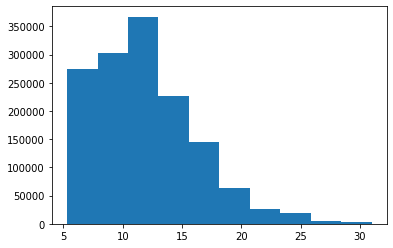

In [107]:
plt.hist(accepted36["int_rate"], bins=10)
print(accepted36["int_rate"].mean())

(array([249596., 226151., 197528., 168364., 143682., 116072.,  48300.,
         74600.,  53742.,  40028.,  31034.,  24439.,  19593.,   7406.,
         12427.,   9691.,   5911.,   3456.,   1626.,    682.]),
 array([662.   , 671.275, 680.55 , 689.825, 699.1  , 708.375, 717.65 ,
        726.925, 736.2  , 745.475, 754.75 , 764.025, 773.3  , 782.575,
        791.85 , 801.125, 810.4  , 819.675, 828.95 , 838.225, 847.5  ]),
 <a list of 20 Patch objects>)

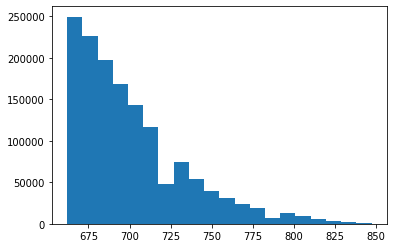

In [67]:
plt.hist(accepted36["fico_range_low"]/2 + accepted36["fico_range_high"]/2, bins=20)

20829.549052758117


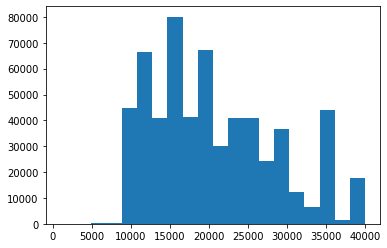

In [105]:
plt.hist(accepted60["loan_amnt"], bins=20)
print(accepted60["loan_amnt"].mean())

15.792035210159138


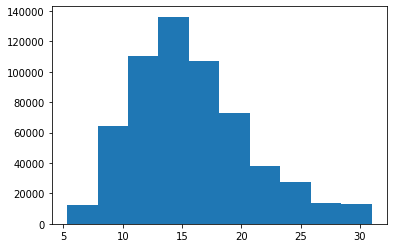

In [106]:
plt.hist(accepted60["int_rate"], bins=10)
print(accepted60["int_rate"].mean())

(array([88228., 86411., 83804., 75708., 67153., 54149., 23018., 33716.,
        23476., 16659., 12381.,  9443.,  7306.,  2669.,  4295.,  3173.,
         1985.,  1220.,   550.,   280.]),
 array([662.   , 671.275, 680.55 , 689.825, 699.1  , 708.375, 717.65 ,
        726.925, 736.2  , 745.475, 754.75 , 764.025, 773.3  , 782.575,
        791.85 , 801.125, 810.4  , 819.675, 828.95 , 838.225, 847.5  ]),
 <a list of 20 Patch objects>)

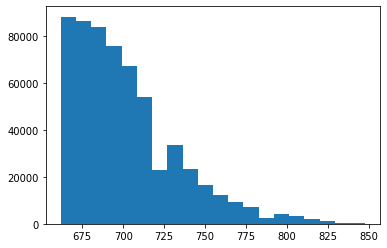

In [69]:
plt.hist(accepted60["fico_range_low"]/2 + accepted60["fico_range_high"]/2, bins=20)

In [85]:
accepted36["WAL"] = (36*accepted36["installment"] - accepted36["loan_amnt"])/(accepted36["loan_amnt"]*accepted36["int_rate"]*0.01)
accepted60["WAL"] = (60*accepted60["installment"] - accepted60["loan_amnt"])/(accepted60["loan_amnt"]*accepted60["int_rate"]*0.01)

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
accepted36["WAL"].median()
#ACAR 2021-2, CPS 2021-C, DRIVE 2021-3, WLAKE 2021-3, TAST 2022-1A

1.6271316477768087

In [89]:
accepted60["WAL"].median()
#SDART 2022-2 B, VEROS 2020-1 D, FCAT 2021-2 B  

2.8493662441627747

In [119]:
purpose36 = accepted36["purpose"].dropna()
purpose36 = pd.Series(' '.join(purpose36).lower().split()).value_counts()

In [120]:
purpose60 = accepted60["purpose"].dropna()
purpose60 = pd.Series(' '.join(purpose60).lower().split()).value_counts()

In [201]:
sdart60 = pd.read_csv("sdart_2022_2_b.csv", low_memory=False)

In [202]:
sdart36 = pd.read_csv("sdart_2022_1_a3.csv", low_memory=False)

In [176]:
sdart60["Credit Score"].median()

590.0

In [177]:
accepted60["fico_range_low"].median()

690.0

In [178]:
og_tloan_a60 = sum(accepted60["loan_amnt"])

In [179]:
og_tbalance_s60 = sum(sdart60["Original Balance"])

In [180]:
sdart60wac = 14.6

In [181]:
sum((sdart60["APR"]*sdart60["Original Balance"])/og_tbalance_s60)

14.690079386812622

In [182]:
sum((accepted60["int_rate"]*accepted60["loan_amnt"])/og_tloan_a60)

15.715420299178371

10.965908243812528

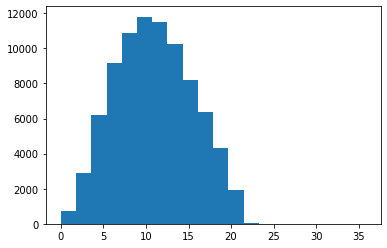

In [183]:
plt.hist(sdart60["Payment to Income Ratio"], bins=20)
sdart60["Payment to Income Ratio"].mean()

(array([3.5960e+03, 1.5347e+04, 2.2678e+04, 2.1776e+04, 1.4591e+04,
        6.1970e+03, 5.8000e+01, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.0000e-02, 3.5860e+00, 7.1620e+00, 1.0738e+01, 1.4314e+01,
        1.7890e+01, 2.1466e+01, 2.5042e+01, 2.8618e+01, 3.2194e+01,
        3.5770e+01]),
 <a list of 10 Patch objects>)

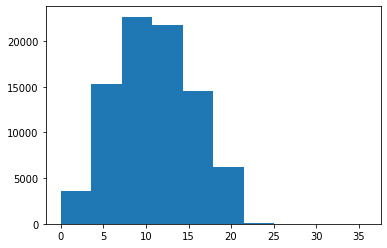

In [184]:
plt.hist(sdart60["Payment to Income Ratio"], bins=10)

In [238]:
sdart60["delinq_2yrs"] = 24*(sdart60["Pay History"].str.count("3") + sdart60["Pay History"].str.count("6") + sdart60["Pay History"].str.count("9"))/sdart["Age"]
sdart60["installment"] = sdart60["APR"]*sdart60["Original Balance"]/1200
sdart60["annual_inc"] = 1200*sdart60["Monthly Payment"]/sdart60["Payment to Income Ratio"]
sdart60["Logged Income"] = np.log(sdart60["Income"])
sdart60["Weight"] = (sdart60["APR"]*sdart60["Original Balance"])/og_tbalance_s60
sdart60 = sdart60.dropna()
sdart60 = sdart60[sdart60["Income"] != 0]
sdart60["rPH"] = sdart60.loc[:,"Pay History"].apply(lambda x: x[::-1])
sdart60["Dummy"] = 0
sdart60["mths_since_last_delinq_3"] = sdart60["rPH"].str.find("3")
sdart60["mths_since_last_delinq_6"] = sdart60["rPH"].str.find("6")
sdart60["mths_since_last_delinq_9"] = sdart60["rPH"].str.find("9")
sdart60["mths_since_last_delinq"] = sdart60[["mths_since_last_delinq_3", "mths_since_last_delinq_6", "mths_since_last_delinq_9", "Dummy"]].max(axis=1)
sdart60["int_rate"] = sdart60["APR"]
sdart60["loan_amnt"] = sdart60["Original Balance"]

In [240]:
y = sdart60["int_rate"]
x = sdart60[["loan_amnt", "Credit Score", "Age", "Logged Income", "delinq_2yrs", "mths_since_last_delinq", "installment"]]
x = sm.add_constant(x)
model_sdart60 = sm.WLS(y, x, weights=sdart60["Weight"]).fit()
model_sdart60.summary()

C:\Users\Michael\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:               int_rate   R-squared:                       0.892
Model:                            WLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 8.724e+04
Date:                Wed, 20 Jul 2022   Prob (F-statistic):               0.00
Time:                        19:54:39   Log-Likelihood:            -1.4640e+05
No. Observations:               73906   AIC:                         2.928e+05
Df Residuals:                   73898   BIC:                         2.929e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     17.5259      0.135    130.046      0.000      17.262      17.790
loan_amnt                 -0.0005   7.84e-07   -580.264      0.000      -0.000      -0.000
Credit Score              -0.0045      0.000    -36.825      0.000      -0.005      -0.004
Age                        0.0125      0.000     33.157      0.000       0.012       0.013
Logged Income              0.0032      0.015      0.215      0.830      -0.026       0.032
delinq_2yrs                0.0280      0.002     12.095      0.000       0.023       0.033
mths_since_last_delinq     0.0036      0.001      3.851      0.000       0.002       0.005
installment                0.0381   6.08e-05    627.027      0.000       0.038       0.038
==============================================================================
Omnibus:                    29955.775   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229512.584
Skew:                           1.766   Prob(JB):                         0.00
Kurtosis:                      10.878   Cond. No.                     6.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [253]:
x = sdart60[["loan_amnt", "Credit Score", "Age", "Logged Income", "delinq_2yrs", "mths_since_last_delinq", "installment"]]
y = sdart60["int_rate"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)
rf = RandomForestRegressor(n_estimators = 100, max_features = 3, random_state=5, oob_score=True).fit(x_train, y_train)
score = rf.score(x_train, y_train)
preds = rf.predict(x_test)
mse = mean_squared_error(y_test, preds)
print("OOB Score: ", rf.oob_score_)
print("R^2 Score: ", score)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Michael\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link 

OOB Score:  0.9969431349777407
R^2 Score:  0.9995818851898131
MSE:  0.06585493057908288
RMSE:  0.03292746528954144
